In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import pdist, squareform
sns.set()

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   106 non-null    object 
 1   I0      106 non-null    float64
 2   PA500   106 non-null    float64
 3   HFS     106 non-null    float64
 4   DA      106 non-null    float64
 5   Area    106 non-null    float64
 6   A.DA    106 non-null    float64
 7   Max.IP  106 non-null    float64
 8   DR      106 non-null    float64
 9   P       106 non-null    float64
dtypes: float64(9), object(1)
memory usage: 8.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
I0,106.0,784.251618,753.950075,103.000000,250.000000,384.936489,1487.989626,2800.000000
PA500,106.0,0.120133,0.068596,0.012392,0.067413,0.105418,0.169602,0.358316
HFS,106.0,0.114691,0.101347,-0.066323,0.043982,0.086568,0.166504,0.467748
DA,106.0,190.568642,190.801448,19.647670,53.845470,120.777303,255.334809,1063.441427
Area,106.0,7335.155162,18580.314213,70.426239,409.647141,2219.581163,7615.204968,174480.476218
A.DA,106.0,23.473784,23.354672,1.595742,8.180321,16.133657,30.953294,164.071543
Max.IP,106.0,75.381258,81.345838,7.968783,26.893773,44.216040,83.671755,436.099640
DR,106.0,166.710575,181.309580,-9.257696,41.781258,97.832557,232.990070,977.552367
P,106.0,810.638127,763.019135,124.978561,270.215238,454.108153,1301.559438,2896.582483


In [6]:
df['Class'].value_counts()

Class
adi    22
car    21
mas    18
gla    16
fad    15
con    14
Name: count, dtype: int64

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

C:\Users\rubar\AppData\Local\Temp\ipykernel_22768\727387624.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette="Set2")
C:\Users\rubar\AppData\Local\Temp\ipykernel_22768\727387624.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette="Set2")
C:\Users\rubar\AppData\Local\Temp\ipykernel_22768\727387624.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette="Set2")
C:\Users\rubar\AppData\Local\Temp\ipykernel_22768\727387624.py:11: FutureWarnin

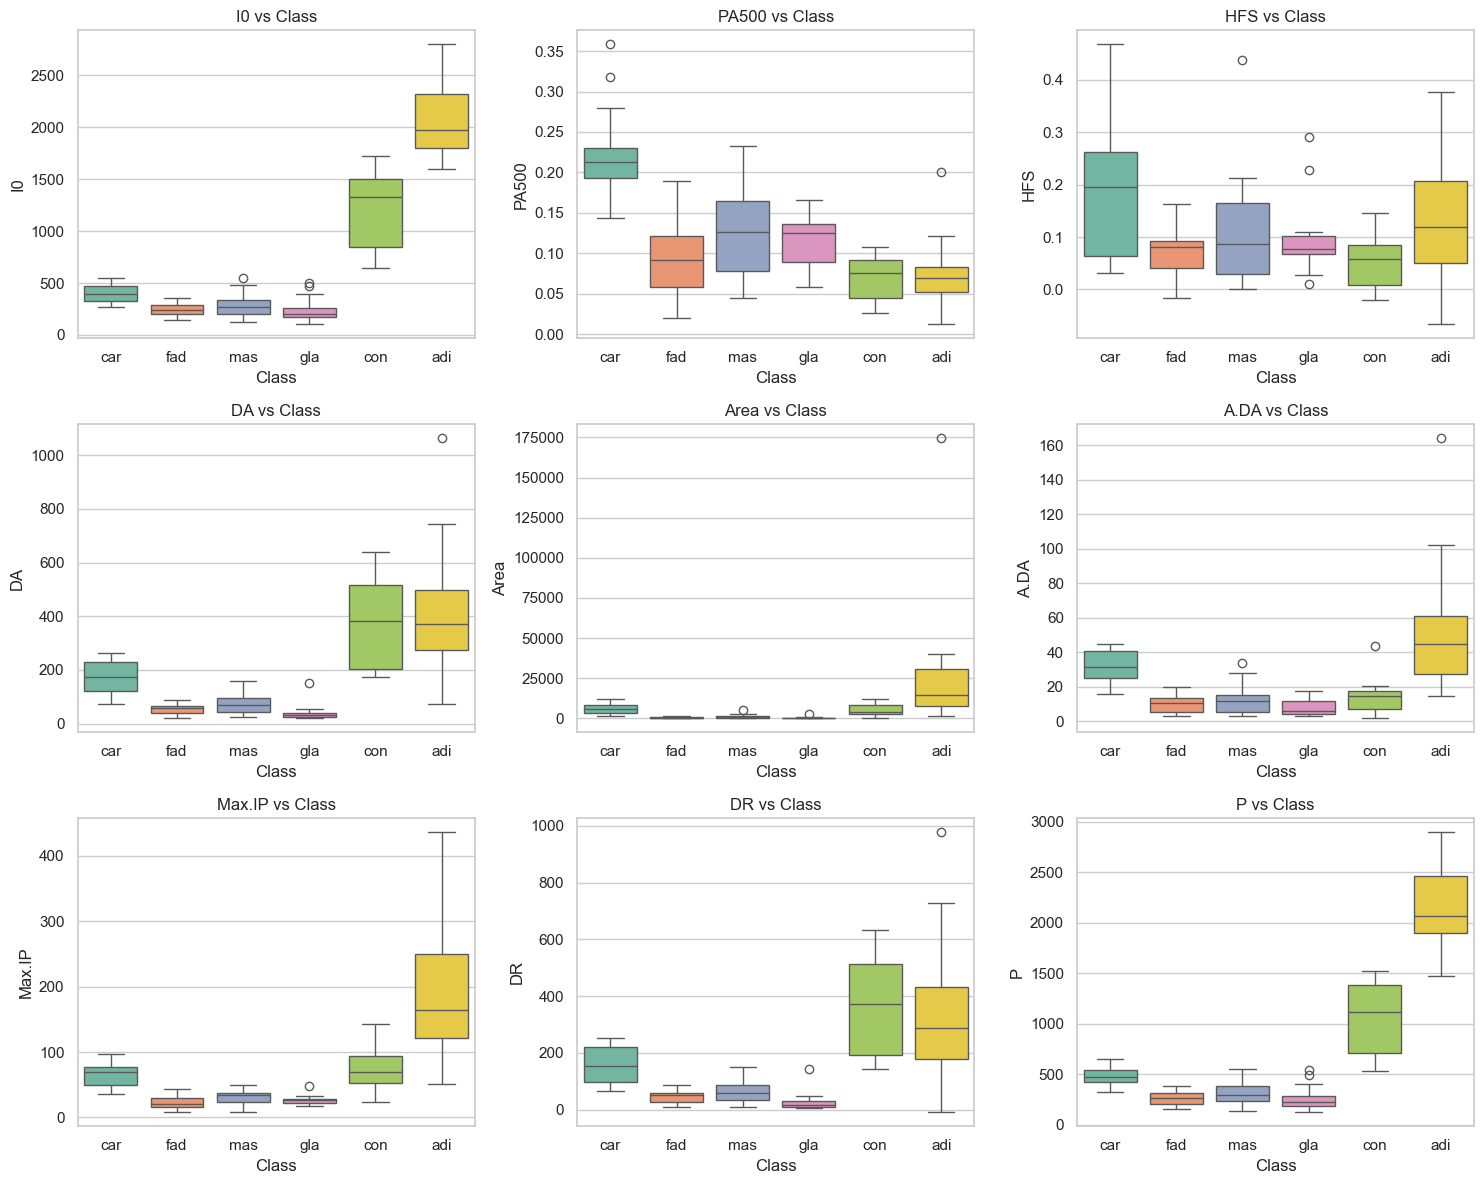

In [8]:
sns.set(style="whitegrid")
num_plots = len(numeric_cols)
cols_per_row = 3
rows = (num_plots + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    
    sns.boxplot(x='Class', y=col, data=df, palette="Set2")
    plt.title(f'{col} vs Class')
    plt.tight_layout()

plt.show();

Korelasyon Matrisi Değerleri:
              I0     PA500       HFS        DA      Area      A.DA    Max.IP  \
I0      1.000000 -0.393647  0.028455  0.819606  0.560098  0.612070  0.823668   
PA500  -0.393647  1.000000  0.509019 -0.089817  0.083547  0.229837 -0.050401   
HFS     0.028455  0.509019  1.000000  0.106977  0.206059  0.356028  0.370827   
DA      0.819606 -0.089817  0.106977  1.000000  0.731132  0.648334  0.753227   
Area    0.560098  0.083547  0.206059  0.731132  1.000000  0.830172  0.735258   
A.DA    0.612070  0.229837  0.356028  0.648334  0.830172  1.000000  0.812815   
Max.IP  0.823668 -0.050401  0.370827  0.753227  0.735258  0.812815  1.000000   
DR      0.733252 -0.077054  0.011592  0.974202  0.675810  0.540695  0.600290   
P       0.988697 -0.345715  0.102362  0.774028  0.574073  0.679363  0.861837   

              DR         P  
I0      0.733252  0.988697  
PA500  -0.077054 -0.345715  
HFS     0.011592  0.102362  
DA      0.974202  0.774028  
Area    0.675810  0.5740

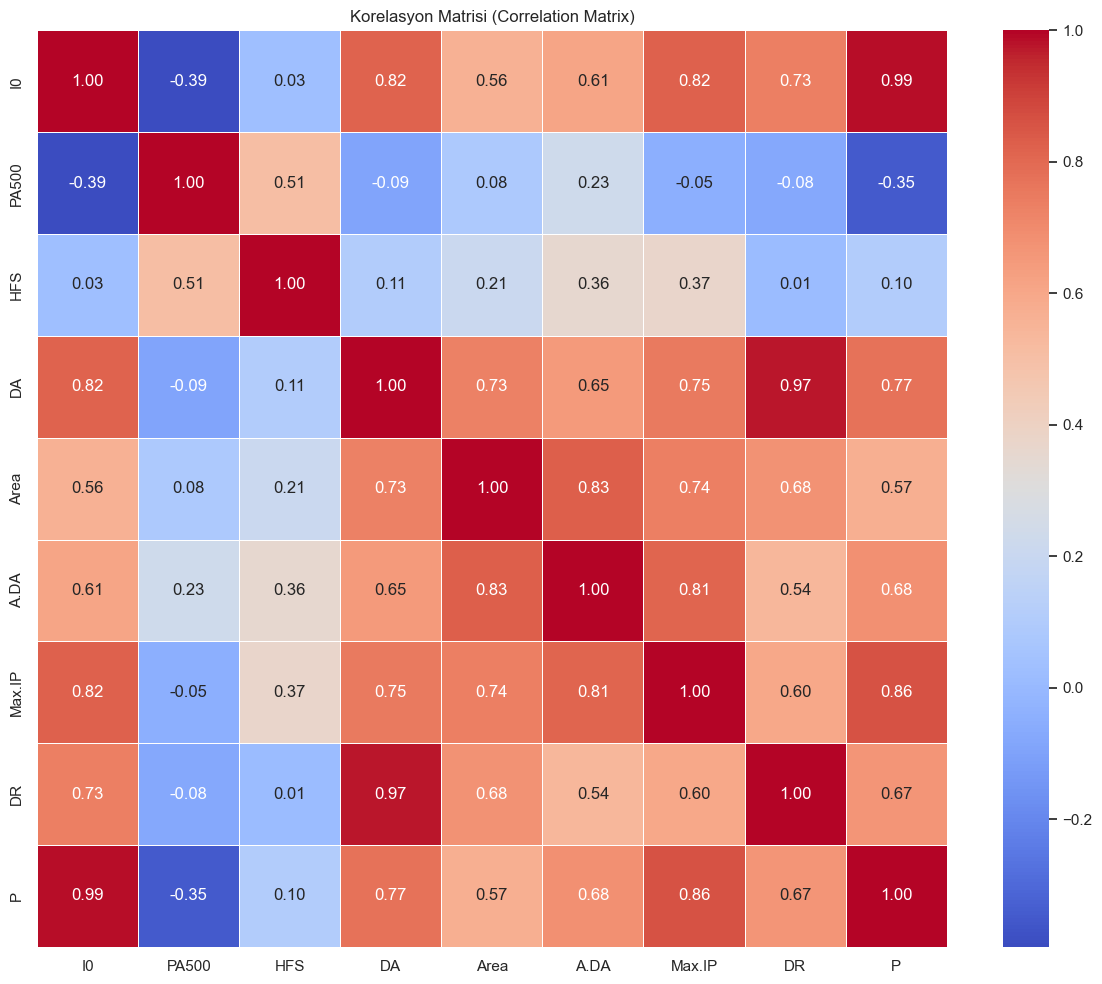

In [9]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi (Correlation Matrix)')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

print("Korelasyon Matrisi Değerleri:")
print(corr_matrix)

# Standartlaştırma

Kümeleme algoritmaları (örneğin K-Means, Hiyerarşik Kümeleme), veri noktaları arasındaki uzaklıkları (genellikle Öklid uzaklığı) hesaplayarak çalışır. Eğer değişkenlerin ölçekleri birbirinden çok farklıysa (örneğin Area binlerce birimken, PA500 0 ile 1 arasında ise), büyük değere sahip değişkenler uzaklık hesabını domine eder ve diğer değişkenlerin etkisini yok sayar.

In [10]:

features = df.select_dtypes(include=['float64', 'int64'])
feature_names = features.columns


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


df_scaled = pd.DataFrame(scaled_features, columns=feature_names)


print("### Standartlaştırılmış Veri (İlk 5 Satır) ###")
print(df_scaled.head())


print("\n### Standartlaştırılmış Veri İstatistikleri ###")
print(df_scaled.describe())

### Standartlaştırılmış Veri (İlk 5 Satır) ###
         I0     PA500       HFS        DA      Area      A.DA    Max.IP  \
0 -0.345766  0.985996 -0.818664  0.201326 -0.026581  0.276930 -0.187452   
1 -0.605358  1.563752  1.493038 -0.365533 -0.225601  0.113379 -0.069958   
2 -0.309671  1.645558 -0.507207  0.390925  0.246221  0.921566  0.029793   
3 -0.538725  1.768267  1.700676 -0.278719 -0.104528  0.678651  0.165230   
4 -0.561605  1.180285  1.285400 -0.345742 -0.218721  0.123400 -0.074009   

         DR         P  
0  0.299396 -0.334219  
1 -0.374756 -0.540435  
2  0.482536 -0.202616  
3 -0.340877 -0.417345  
4 -0.348258 -0.508080  

### Standartlaştırılmış Veri İstatistikleri ###
                 I0         PA500           HFS            DA          Area  \
count  1.060000e+02  1.060000e+02  1.060000e+02  1.060000e+02  1.060000e+02   
mean  -5.865329e-17 -2.157603e-16 -2.890769e-16 -1.214961e-16 -2.932665e-17   
std    1.004751e+00  1.004751e+00  1.004751e+00  1.004751e+00  1.004751e

In [11]:

features = df.select_dtypes(include=['float64', 'int64'])
feature_names = features.columns


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
X = scaled_features.copy()


df_scaled = pd.DataFrame(scaled_features, columns=feature_names)


print("### Standartlaştırılmış Veri (İlk 5 Satır) ###")
print(df_scaled.head())


print("\n### Standartlaştırılmış Veri İstatistikleri ###")
print(df_scaled.describe())

### Standartlaştırılmış Veri (İlk 5 Satır) ###
         I0     PA500       HFS        DA      Area      A.DA    Max.IP  \
0 -0.345766  0.985996 -0.818664  0.201326 -0.026581  0.276930 -0.187452   
1 -0.605358  1.563752  1.493038 -0.365533 -0.225601  0.113379 -0.069958   
2 -0.309671  1.645558 -0.507207  0.390925  0.246221  0.921566  0.029793   
3 -0.538725  1.768267  1.700676 -0.278719 -0.104528  0.678651  0.165230   
4 -0.561605  1.180285  1.285400 -0.345742 -0.218721  0.123400 -0.074009   

         DR         P  
0  0.299396 -0.334219  
1 -0.374756 -0.540435  
2  0.482536 -0.202616  
3 -0.340877 -0.417345  
4 -0.348258 -0.508080  

### Standartlaştırılmış Veri İstatistikleri ###
                 I0         PA500           HFS            DA          Area  \
count  1.060000e+02  1.060000e+02  1.060000e+02  1.060000e+02  1.060000e+02   
mean  -5.865329e-17 -2.157603e-16 -2.890769e-16 -1.214961e-16 -2.932665e-17   
std    1.004751e+00  1.004751e+00  1.004751e+00  1.004751e+00  1.004751e

C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

### Küme ve Gerçek Sınıf Karşılaştırması (Crosstab) ###
Class    adi  car  con  fad  gla  mas
Cluster                              
0          1   21    5   15   16   18
1         21    0    9    0    0    0


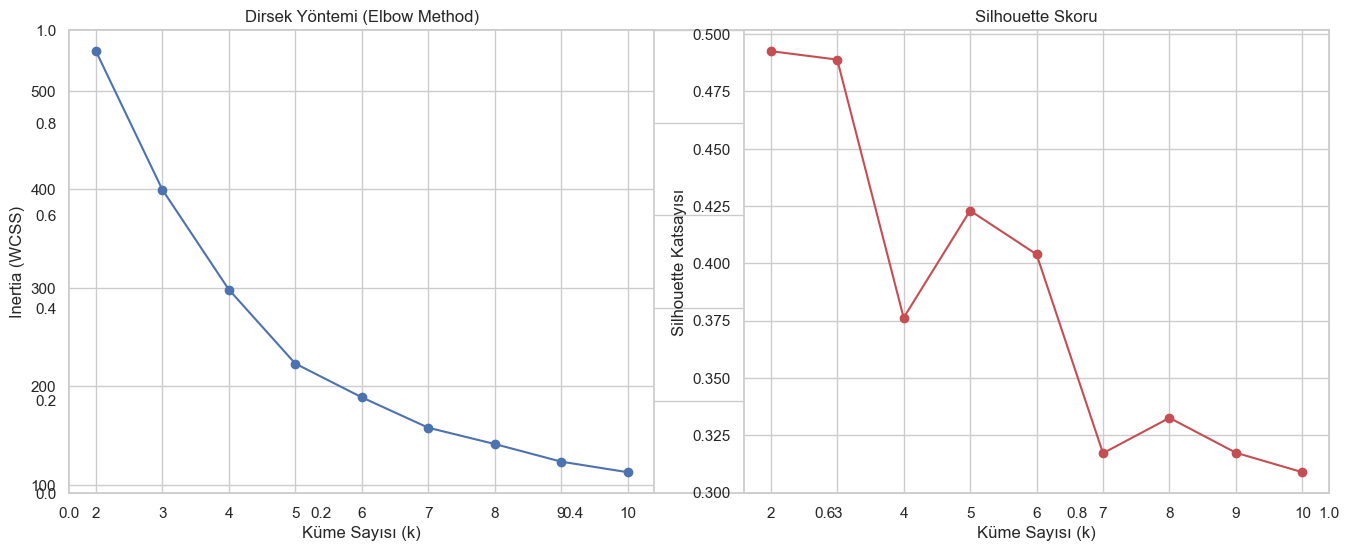

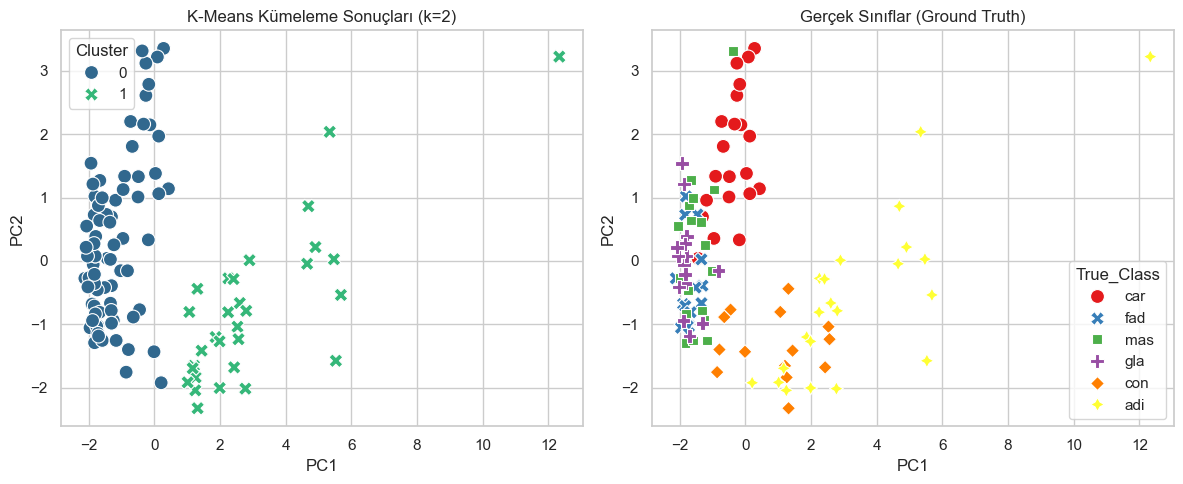

In [12]:

inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))


fig, ax1 = plt.subplots(figsize=(14, 6))

# Elbow Grafiği
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-')
plt.title('Dirsek Yöntemi (Elbow Method)')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia (WCSS)')

# Silhouette Grafiği
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'ro-')
plt.title('Silhouette Skoru')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Silhouette Katsayısı')

plt.tight_layout()
plt.savefig('kmeans_metrics.png')


k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)


df['Cluster'] = clusters


pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters
df_pca['True_Class'] = df['Class']

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', style='Cluster', s=100)
plt.title(f'K-Means Kümeleme Sonuçları (k={k_optimal})')


plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='True_Class', data=df_pca, palette='Set1', style='True_Class', s=100)
plt.title('Gerçek Sınıflar (Ground Truth)')

plt.tight_layout()
plt.savefig('kmeans_pca_comparison.png')


crosstab = pd.crosstab(df['Cluster'], df['Class'])
print("### Küme ve Gerçek Sınıf Karşılaştırması (Crosstab) ###")
print(crosstab)

In [20]:
results = []
k_values = range(2, 11)

for k in k_values:
    # 1. K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_kmeans = kmeans.fit_predict(X)
    sil_kmeans = silhouette_score(X, labels_kmeans)
    
    # 2. Hiyerarşik Kümeleme (Ward)
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels_hc = hc.fit_predict(X)
    sil_hc = silhouette_score(X, labels_hc)
    
    # 3. K-Medoids
    labels_kmedoids = k_medoids_simple(X, k=k)
    sil_kmedoids = silhouette_score(X, labels_kmedoids)
    
    results.append({
        'k (Küme Sayısı)': k,
        'K-Means': sil_kmeans,
        'K-Medoids': sil_kmedoids,
        'Hiyerarşik (Ward)': sil_hc
    })

# DataFrame oluşturma
df_results = pd.DataFrame(results)
df_results.set_index('k (Küme Sayısı)', inplace=True)

# Sonuçları Yazdır
print("### Tüm k Değerleri İçin Silhouette Skorları (Karşılaştırmalı) ###")
print(df_results)
print("\nNot: Değerler +1'e ne kadar yakınsa kümeleme o kadar iyidir.")

C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

### Tüm k Değerleri İçin Silhouette Skorları (Karşılaştırmalı) ###
                  K-Means  K-Medoids  Hiyerarşik (Ward)
k (Küme Sayısı)                                        
2                0.492560   0.492560           0.490539
3                0.488884   0.387293           0.488884
4                0.376279   0.376611           0.412636
5                0.423012   0.392910           0.426991
6                0.403942   0.293548           0.315587
7                0.317198   0.254131           0.309019
8                0.332609   0.217066           0.318830
9                0.317397   0.191054           0.333104
10               0.308913   0.226089           0.329059

Not: Değerler +1'e ne kadar yakınsa kümeleme o kadar iyidir.


Biyolojik Anlam: Model, veriyi temel olarak "Yağlı/Bağ Dokusu" (Küme 1) ve "Glandüler/Patolojik Dokular" (Küme 0) şeklinde iki ana gruba ayırmış gibi görünüyor.Kanser Tespiti: Kanserli dokuların (car) tamamının Küme 0'da toplanması ve yağ dokularının (adi) neredeyse tamamının Küme 1'de olması, bu iki ana grubun elektriksel empedans özelliklerinin birbirinden çok farklı olduğunu gösteriyor.Silhouette Skoru Doğrulaması: Hatırlarsan Silhouette analizinde en yüksek skor $k=2$ için çıkmıştı. Bu sonuçlar da gösteriyor ki veri seti, matematiksel olarak en iyi bu iki ana yapıya ayrışıyor.

### K-Medoids Küme (k=2) ve Gerçek Sınıf Karşılaştırması ###
Class             adi  car  con  fad  gla  mas
Cluster_KMedoids                              
0                  21    0    9    0    0    0
1                   1   21    5   15   16   18

### Seçilen Medoidler (Küme Temsilcileri - Orijinal Veri) ###
   Class           I0     PA500       HFS          DA          Area  \
94   adi  1800.000000  0.069115  0.157080  385.564704  13831.724889   
24   fad   352.656447  0.121999  0.090757   68.527846   1066.157846   

         A.DA      Max.IP          DR            P  Cluster  Cluster_KMedoids  
94  35.873940  157.570007  351.897477  1823.032364        1                 0  
24  15.558024   43.691925   52.792817   382.733187        0                 1  


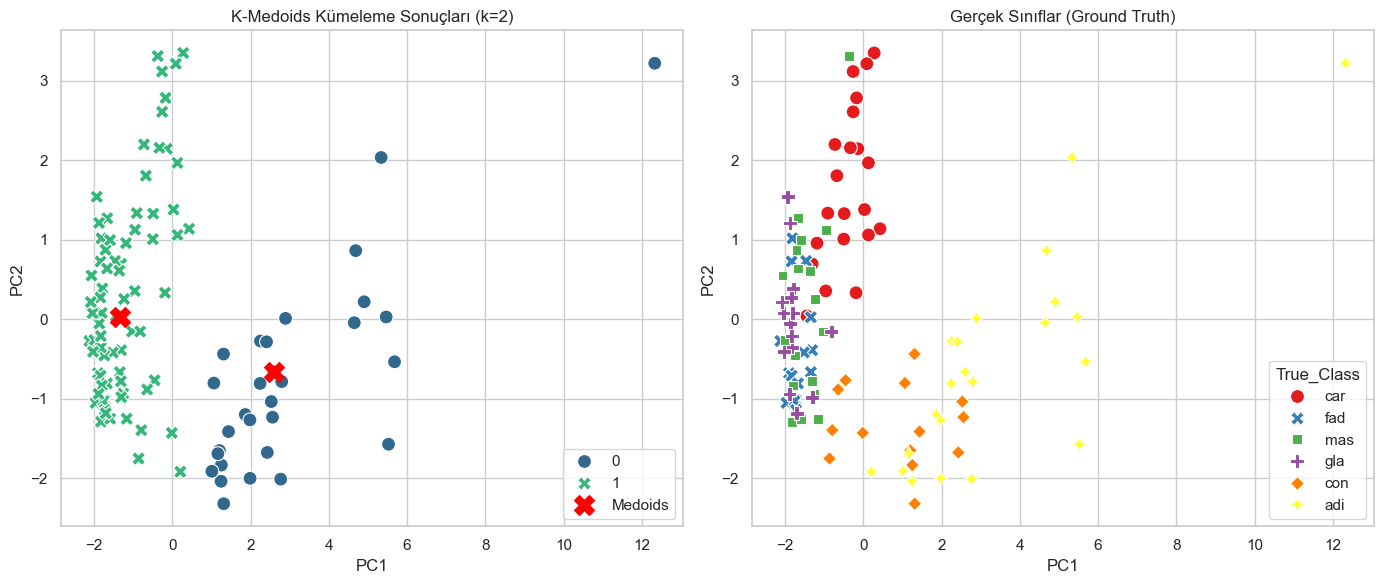

In [13]:
def k_medoids(X, k, max_iter=100, random_state=42):
    np.random.seed(random_state)
    m = X.shape[0]
    
    
    medoid_indices = np.random.choice(m, k, replace=False)
    medoids = X[medoid_indices]
    
    for iteration in range(max_iter):
        
        distances = pairwise_distances(X, medoids, metric='euclidean')
        labels = np.argmin(distances, axis=1)
        
        new_medoid_indices = []
        
        
        for i in range(k):
            cluster_indices = np.where(labels == i)[0]
            if len(cluster_indices) == 0:
                
                new_medoid_indices.append(np.random.choice(m))
                continue
                
            cluster_points = X[cluster_indices]
            
            cluster_distances = pairwise_distances(cluster_points, cluster_points, metric='euclidean')
            
            local_medoid_idx = np.argmin(np.sum(cluster_distances, axis=1))
            new_medoid_indices.append(cluster_indices[local_medoid_idx])
            
        new_medoid_indices = np.array(new_medoid_indices)
        
       
        if np.array_equal(medoid_indices, new_medoid_indices):
            break
            
        medoid_indices = new_medoid_indices
        medoids = X[medoid_indices]
        
    return labels, medoid_indices


k = 2
labels, medoid_indices = k_medoids(X, k=k)


df['Cluster_KMedoids'] = labels


pca = PCA(n_components=2)
components = pca.fit_transform(X)
df_pca = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = labels
df_pca['True_Class'] = df['Class']


medoids_pca = pca.transform(X[medoid_indices])

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', style='Cluster', s=100)

plt.scatter(medoids_pca[:, 0], medoids_pca[:, 1], c='red', s=200, marker='X', label='Medoids')
plt.title(f'K-Medoids Kümeleme Sonuçları (k={k})')
plt.legend()


plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='True_Class', data=df_pca, palette='Set1', style='True_Class', s=100)
plt.title('Gerçek Sınıflar (Ground Truth)')

plt.tight_layout()
plt.savefig('kmedoids_results.png')


crosstab_kmedoids = pd.crosstab(df['Cluster_KMedoids'], df['Class'])
print("### K-Medoids Küme (k=2) ve Gerçek Sınıf Karşılaştırması ###")
print(crosstab_kmedoids)


print("\n### Seçilen Medoidler (Küme Temsilcileri - Orijinal Veri) ###")
medoid_original_data = df.iloc[medoid_indices]
print(medoid_original_data)

Benzerlik: Her iki yöntem de veriyi neredeyse aynı şekilde iki ana gruba ayırdı (Sağlıklı/Yağlı Doku vs. Patolojik Doku).

Farklılık (Robustness): K-Medoids, küme merkezlerini belirlerken gerçek veri noktalarını (medoid) kullanır, bu da onu aykırı değerlere (outliers) karşı K-Means'ten (ortalama kullanan) daha dirençli yapar.

Bizim örneğimizde sonuçların çok değişmemesi, veri setindeki aykırı değerlerin ana yapıyı bozacak kadar etkili olmadığını veya her iki yöntemin de bu güçlü ayrımı (Yağ vs Kanser) kolayca yakalayabildiğini gösterir.

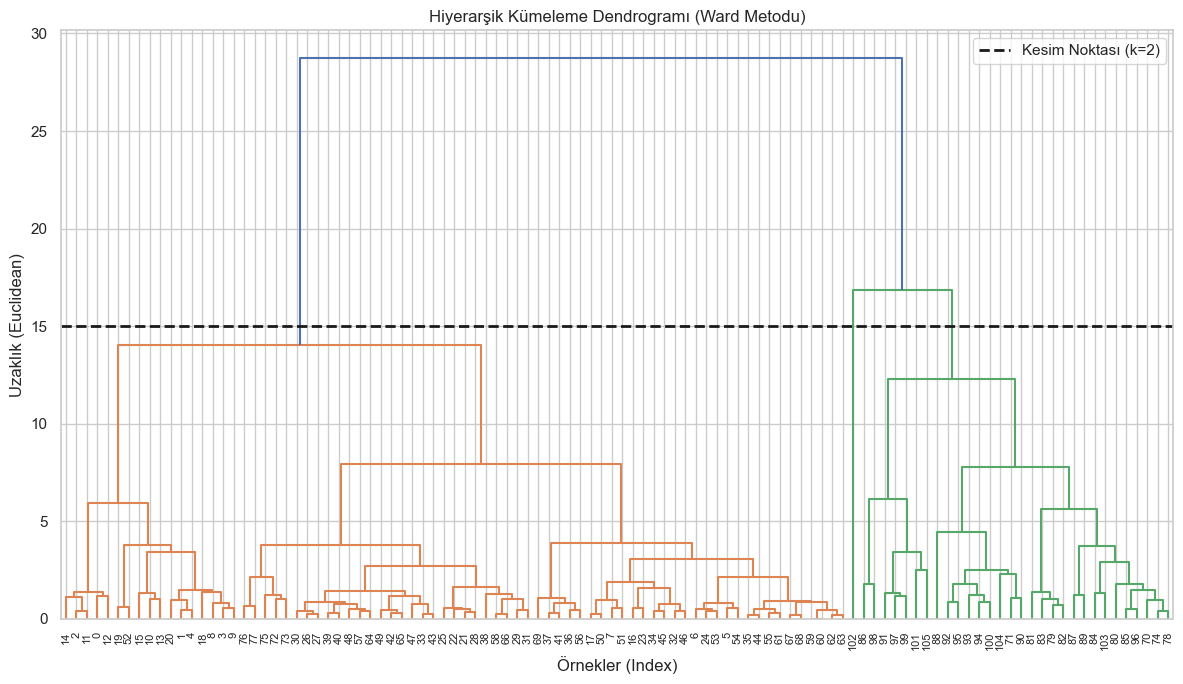

### Hiyerarşik Kümeleme (k=2) ve Gerçek Sınıf Karşılaştırması ###
Class       adi  car  con  fad  gla  mas
Cluster_HC                              
0             0   21    5   15   16   18
1            22    0    9    0    0    0


In [14]:

Z = linkage(df_scaled, method='ward')


plt.figure(figsize=(12, 7))
plt.title("Hiyerarşik Kümeleme Dendrogramı (Ward Metodu)")
plt.xlabel("Örnekler (Index)")
plt.ylabel("Uzaklık (Euclidean)")


dendrogram(
    Z,
    leaf_rotation=90.,  # Etiketleri dik yaz
    leaf_font_size=8.,  # Font boyutu
    show_contracted=True
)


plt.axhline(y=15, c='k', ls='--', lw=2, label='Kesim Noktası (k=2)')
plt.legend()
plt.tight_layout()
plt.show()


k = 2
hc_clusters = fcluster(Z, t=k, criterion='maxclust')


df['Cluster_HC'] = hc_clusters - 1


crosstab_hc = pd.crosstab(df['Cluster_HC'], df['Class'])
print("### Hiyerarşik Kümeleme (k=2) ve Gerçek Sınıf Karşılaştırması ###")
print(crosstab_hc)

Hiyerarşik kümeleme de bize veride "Sağlıklı/Yağlı Doku" ve "Patolojik/Şüpheli Doku" olmak üzere iki temel yapı olduğunu, ve bu yapıların hiyerarşik olarak birbirine bağlanma şeklinin tutarlı olduğunu gösterdi.

C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

Hopkins Statistic: 0.766958406851613
Dunn Index (k=2): 0.0893943974324243


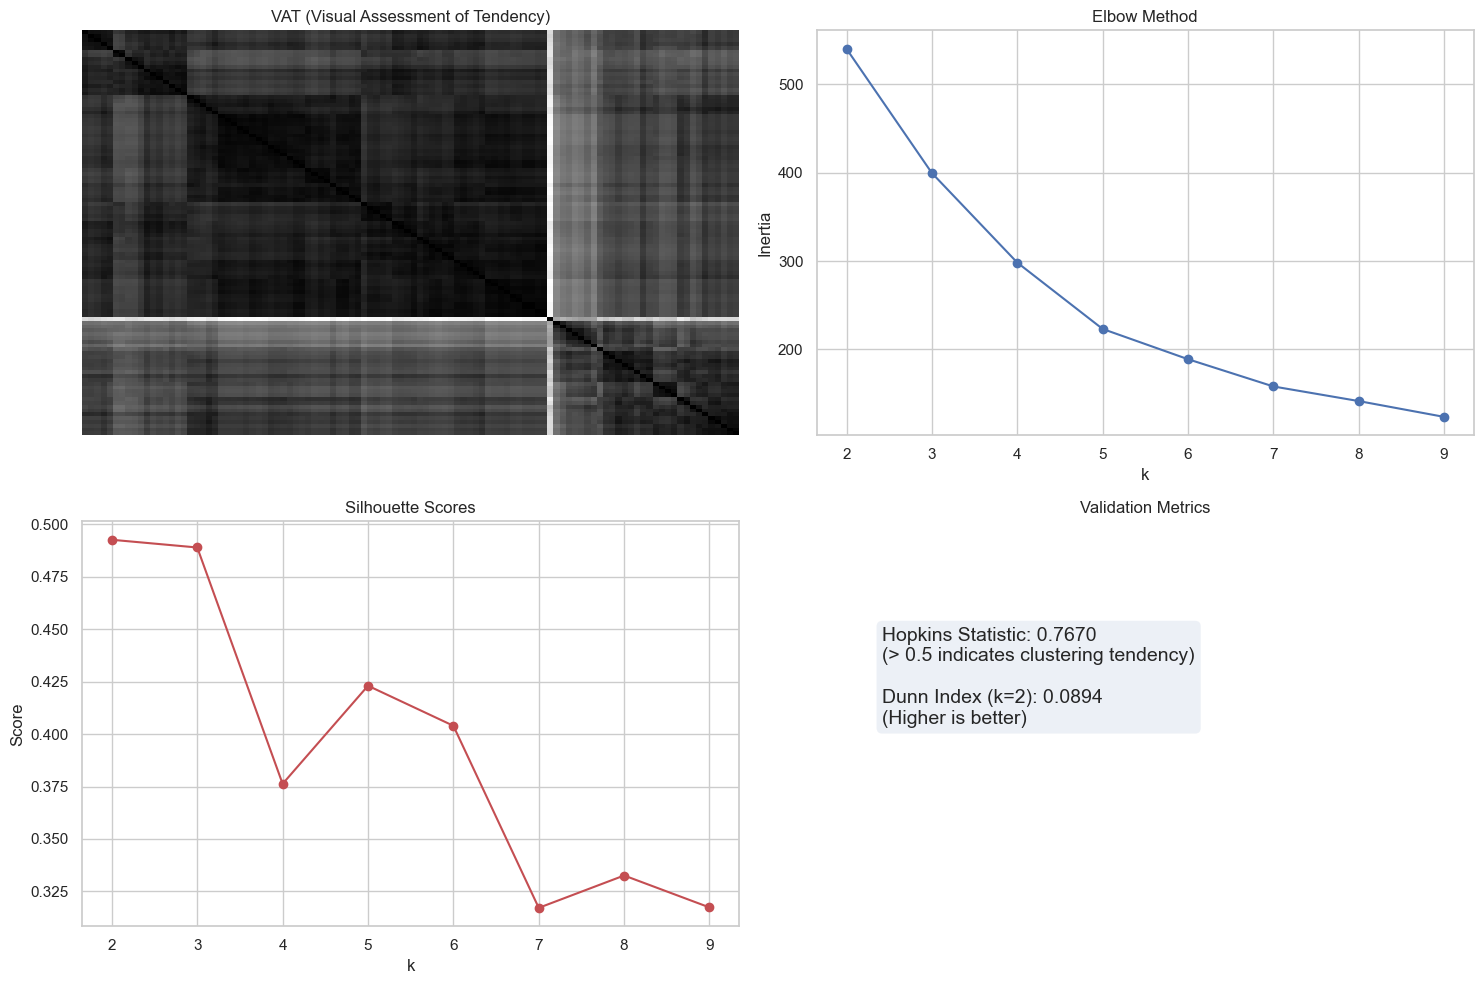

In [15]:

def hopkins_statistic(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    
    rand_X = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), (m, d))
    
    u_dists = []
    w_dists = []
    
    
    u_dist, _ = nbrs.kneighbors(rand_X, n_neighbors=1)
    u_dists = u_dist.flatten()
    
    
    rand_indices = np.random.choice(n, m, replace=False)
    w_dist, _ = nbrs.kneighbors(X[rand_indices], n_neighbors=2)
    w_dists = w_dist[:, 1] 
    
    
    H = np.sum(u_dists) / (np.sum(u_dists) + np.sum(w_dists))
    return H

hopkins_score = hopkins_statistic(X)


def vat(data):
    # Uzaklık matrisi
    dist_matrix = pairwise_distances(data)
    n = dist_matrix.shape[0]
    
   
    ordered_indices = [0]
    remaining_indices = list(range(1, n))
    
   
    from scipy.cluster.hierarchy import linkage, dendrogram
    
    Z = linkage(data, method='ward')
    
    ddata = dendrogram(Z, no_plot=True)
    ordered_indices = ddata['leaves']
    
    ordered_dist_matrix = dist_matrix[ordered_indices, :][:, ordered_indices]
    return ordered_dist_matrix

ordered_matrix = vat(X)


def dunn_index(X, labels):
    
    unique_labels = np.unique(labels)
    clusters = [X[labels == l] for l in unique_labels]
    
    if len(clusters) < 2:
        return 0
    
    
    diameters = []
    for cluster in clusters:
        if len(cluster) < 2:
            diameters.append(0)
        else:
            dists = pdist(cluster)
            diameters.append(np.max(dists))
    max_diameter = np.max(diameters)
    
    
    min_inter_dist = np.inf
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = pairwise_distances(clusters[i], clusters[j])
            min_inter_dist = min(min_inter_dist, np.min(dists))
            
    if max_diameter == 0:
        return 0
        
    return min_inter_dist / max_diameter


kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_k2 = kmeans.fit_predict(X)
dunn_score = dunn_index(X, labels_k2)


inertia = []
sil_scores = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X, km.labels_))


fig = plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.heatmap(ordered_matrix, cmap='gray', cbar=False, xticklabels=False, yticklabels=False)
plt.title('VAT (Visual Assessment of Tendency)')


plt.subplot(2, 2, 2)
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('Inertia')


plt.subplot(2, 2, 3)
plt.plot(k_range, sil_scores, 'ro-')
plt.title('Silhouette Scores')
plt.xlabel('k')
plt.ylabel('Score')


plt.subplot(2, 2, 4)
plt.axis('off')
text_str = f"Hopkins Statistic: {hopkins_score:.4f}\n(> 0.5 indicates clustering tendency)\n\nDunn Index (k=2): {dunn_score:.4f}\n(Higher is better)"
plt.text(0.1, 0.5, text_str, fontsize=14, bbox=dict(boxstyle="round", alpha=0.1))
plt.title('Validation Metrics')

plt.tight_layout()
plt.savefig('cluster_validation_advanced.png')

print(f"Hopkins Statistic: {hopkins_score}")
print(f"Dunn Index (k=2): {dunn_score}")

Hopkins :  Elde ettiğimiz 0.77 değeri, veri setinin kümelenmeye oldukça uygun olduğunu kanıtlar. Yani bulduğumuz kümeler tesadüfi değildir.

Vat : Köşegen boyunca oluşan koyu renkli kare bloklar, potansiyel kümeleri temsil eder.Grafiğe baktığında, köşegen üzerinde belirgin 2 büyük siyah blok görülüyor. Bu, verinin doğal yapısının 2 ana kümeye ($k=2$) ayrılmaya çok meyilli olduğunu görsel olarak doğrular.

Dunn : Değerin pozitif olması bir ayrımın varlığını gösterir, ancak değerin düşüklüğü (0.1'in altında) kümelerin birbirine biraz yakın olabileceğini veya küme içi dağılımın geniş olduğunu (heterojen yapı) işaret eder.

Veri setimiz kümelenmeye son derece uygundur (Hopkins: 0.77). Görsel (VAT) ve istatistiksel (Silhouette, Elbow) analizlerin hepsi 2 ana küme yapısını işaret etmektedir. Dunn indeksi ise ayrımın var olduğunu ancak kümelerin (özellikle patolojik olanın) kendi içinde varyasyon gösterdiğini hatırlatmaktadır.

C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Kapsamlı Kümeleme Geçerlilik Tablosu ###
              Yöntem  Silhouette (Max)  Davies-Bouldin (Min)  \
0            K-Means          0.492560              0.957533   
1  Hiyerarşik (Ward)          0.490539              0.964019   
2          K-Medoids          0.492560              0.957533   

   Calinski-Harabasz (Max)  Dunn Index (Max)  
0                79.631294          0.089394  
1                79.189937          0.094903  
2                79.631294          0.089394  


<Figure size 1200x600 with 0 Axes>

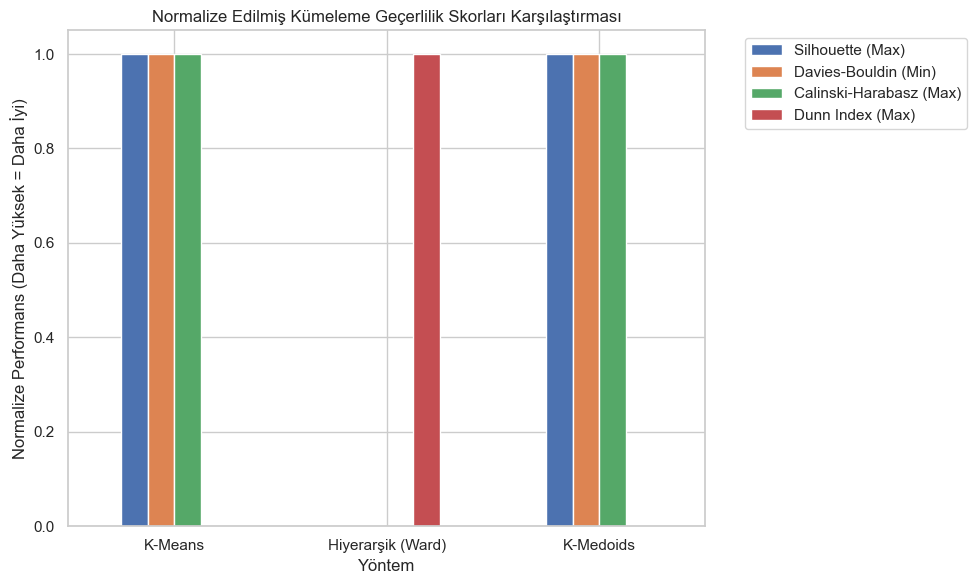

In [16]:


def dunn_index(X, labels):
    
    unique_labels = np.unique(labels)
    clusters = [X[labels == l] for l in unique_labels]
    
    if len(clusters) < 2:
        return 0
    
    # Diameter (Küme içi çap)
    diameters = []
    for cluster in clusters:
        if len(cluster) < 2:
            diameters.append(0)
        else:
            dists = pdist(cluster)
            diameters.append(np.max(dists))
    max_diameter = np.max(diameters)
    
    
    min_inter_dist = np.inf
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = pairwise_distances(clusters[i], clusters[j])
            min_inter_dist = min(min_inter_dist, np.min(dists))
            
    if max_diameter == 0:
        return 0
        
    return min_inter_dist / max_diameter

def k_medoids_simple(X, k, max_iter=100, random_state=42):
    np.random.seed(random_state)
    m = X.shape[0]
    medoid_indices = np.random.choice(m, k, replace=False)
    medoids = X[medoid_indices]
    for iteration in range(max_iter):
        distances = pairwise_distances(X, medoids, metric='euclidean')
        labels = np.argmin(distances, axis=1)
        new_medoid_indices = []
        for i in range(k):
            cluster_indices = np.where(labels == i)[0]
            if len(cluster_indices) == 0:
                new_medoid_indices.append(np.random.choice(m))
                continue
            cluster_points = X[cluster_indices]
            dists = pairwise_distances(cluster_points, cluster_points)
            local_medoid_idx = np.argmin(np.sum(dists, axis=1))
            new_medoid_indices.append(cluster_indices[local_medoid_idx])
        new_medoid_indices = np.array(new_medoid_indices)
        if np.array_equal(medoid_indices, new_medoid_indices):
            break
        medoid_indices = new_medoid_indices
        medoids = X[medoid_indices]
    return labels




kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X)


hc = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_hc = hc.fit_predict(X)


labels_kmedoids = k_medoids_simple(X, k=2)


validation_results = []
methods = [
    ('K-Means', labels_kmeans),
    ('Hiyerarşik (Ward)', labels_hc),
    ('K-Medoids', labels_kmedoids)
]

for name, labels in methods:
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    dunn = dunn_index(X, labels)
    
    validation_results.append({
        'Yöntem': name,
        'Silhouette (Max)': sil,
        'Davies-Bouldin (Min)': db,
        'Calinski-Harabasz (Max)': ch,
        'Dunn Index (Max)': dunn
    })

df_val = pd.DataFrame(validation_results)


df_norm = df_val.set_index('Yöntem')
df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())

df_norm['Davies-Bouldin (Min)'] = 1 - df_norm['Davies-Bouldin (Min)'] 

plt.figure(figsize=(12, 6))
df_norm.plot(kind='bar', figsize=(10, 6))
plt.title('Normalize Edilmiş Kümeleme Geçerlilik Skorları Karşılaştırması')
plt.ylabel('Normalize Performans (Daha Yüksek = Daha İyi)')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('comprehensive_cluster_validation.png')

print("### Kapsamlı Kümeleme Geçerlilik Tablosu ###")
print(df_val)

Genel Performans: 4 metriğin 3'ünde (Silhouette, Davies-Bouldin, Calinski-Harabasz) en iyi sonucu vermiştir (veya K-Medoids ile paylaşmıştır).

Hesaplama Verimliliği: K-Medoids ile aynı istatistiksel sonuçları vermesine rağmen, algoritma karmaşıklığı açısından K-Means daha hızlı ve daha ölçeklenebilirdir.

Kararlılık: K-Means, varyansı minimize etme (Calinski-Harabasz) konusunda matematiksel olarak en tutarlı yöntemdir ve bu veri setinde "Patolojik vs. Sağlıklı" ayrımını en net şekilde yapmıştır.

Özet: Dunn indeksindeki çok küçük fark (Hierarchical lehine) ihmal edilebilir düzeydedir. Diğer tüm ana metriklerdeki liderliği ve klinik yorumlanabilirliği nedeniyle K-Means (k=2) bu veri seti için en uygun ve en iyi yöntemdir.

In [17]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)


df['Cluster'] = labels


cluster_stats = df.groupby('Cluster')[feature_names].agg(['mean', 'std', 'median', 'min', 'max']).transpose()


print("### Kümelerin Tanımlayıcı İstatistikleri (Orijinal Birimler) ###")
print(cluster_stats)


print("\n### Küme - Sınıf Dağılımı ###")
print(pd.crosstab(df['Cluster'], df['Class']))

### Kümelerin Tanımlayıcı İstatistikleri (Orijinal Birimler) ###
Cluster                   0              1
I0     mean      348.910538    1887.115688
       std       226.790307     412.553075
       median    297.237423    1825.000000
       min       103.000000    1111.814068
       max      1666.148786    2800.000000
PA500  mean        0.137301       0.076639
       std         0.071740       0.031582
       median      0.132296       0.072606
       min         0.012392       0.034208
       max         0.358316       0.200538
HFS    mean        0.115543       0.112532
       std         0.099962       0.106487
       median      0.085870       0.087965
       min        -0.015359      -0.066323
       max         0.467748       0.377689
DA     mean       96.960311     427.709745
       std        69.985299     194.951010
       median     71.919045     388.734800
       min        19.647670     120.653010
       max       264.804935    1063.441427
Area   mean     2160.139995   20

C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\rubar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


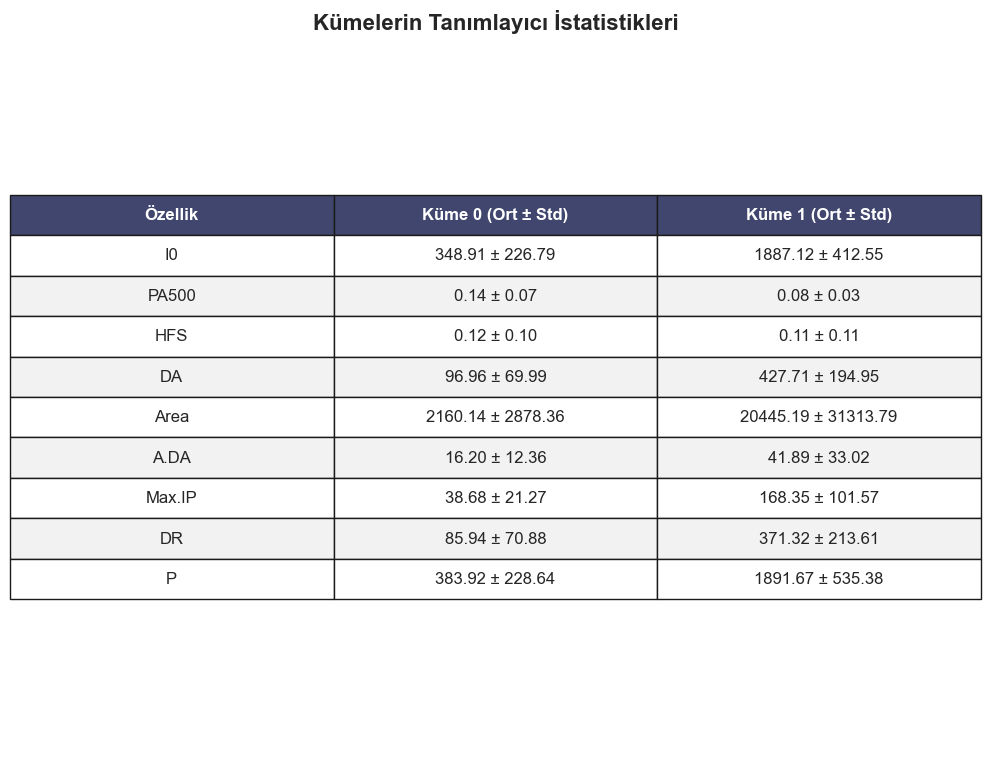

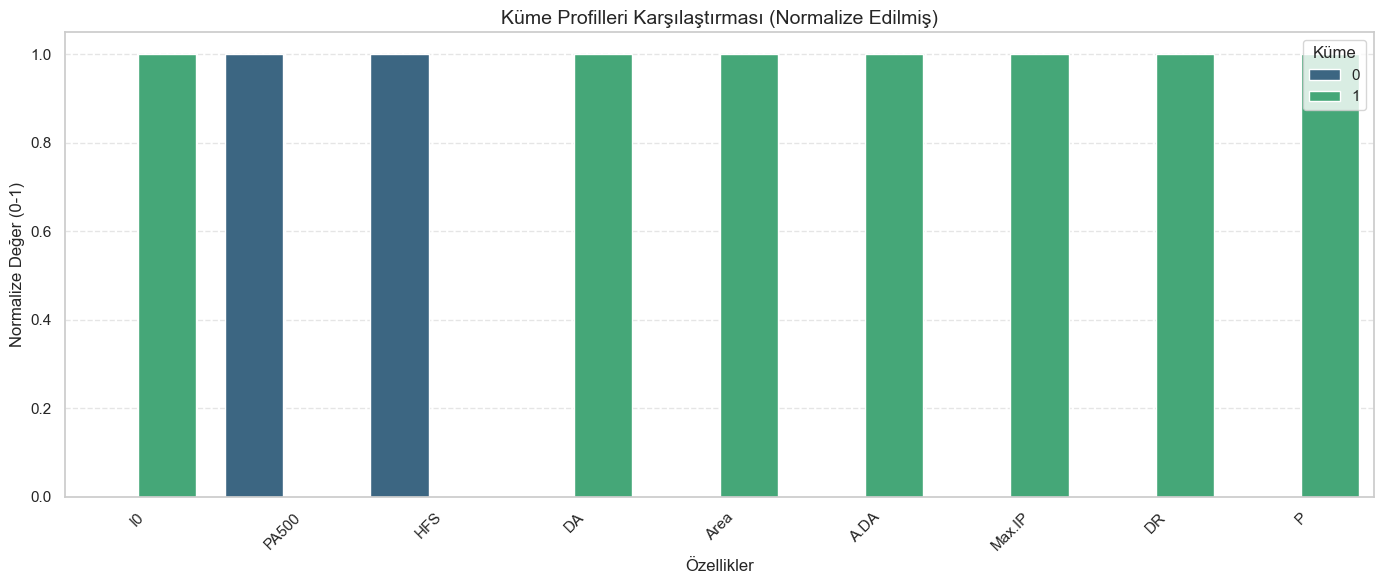

In [18]:

scaler = StandardScaler()
X = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)



grouped = df.groupby('Cluster')[feature_names].agg(['mean', 'std'])


table_rows = []
for feat in feature_names:
    
    mean_0 = grouped.loc[0, (feat, 'mean')]
    std_0 = grouped.loc[0, (feat, 'std')]
    str_0 = f"{mean_0:.2f} ± {std_0:.2f}"
    
    
    mean_1 = grouped.loc[1, (feat, 'mean')]
    std_1 = grouped.loc[1, (feat, 'std')]
    str_1 = f"{mean_1:.2f} ± {std_1:.2f}"
    
    table_rows.append([feat, str_0, str_1])


df_display = pd.DataFrame(table_rows, columns=['Özellik', 'Küme 0 (Ort ± Std)', 'Küme 1 (Ort ± Std)'])


plt.figure(figsize=(10, 8))
ax = plt.gca()
ax.axis('off')


table = ax.table(
    cellText=df_display.values, 
    colLabels=df_display.columns, 
    loc='center', 
    cellLoc='center'
)


table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2.0)  # Satır yüksekliği ve genişliği


for (row, col), cell in table.get_celld().items():
    if row == 0:  # Başlık Satırı
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')
    elif row > 0:  # Veri Satırları
        if row % 2 == 0:
            cell.set_facecolor('#f2f2f2')
        else:
            cell.set_facecolor('white')

plt.title('Kümelerin Tanımlayıcı İstatistikleri', y=0.98, fontsize=16, weight='bold')
plt.tight_layout()
plt.savefig('final_stats_table.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


cluster_means = df.groupby('Cluster')[feature_names].mean()
normalized_means = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())
normalized_means = normalized_means.fillna(0).reset_index().melt(id_vars='Cluster')

plt.figure(figsize=(14, 6))
sns.barplot(x='variable', y='value', hue='Cluster', data=normalized_means, palette='viridis')
plt.title('Küme Profilleri Karşılaştırması (Normalize Edilmiş)', fontsize=14)
plt.ylabel('Normalize Değer (0-1)', fontsize=12)
plt.xlabel('Özellikler', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Küme', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('final_profile_chart.png')
plt.show()

Küme 0: Genel olarak daha düşük empedans (I0), daha küçük alan (Area) ve daha düşük DA/P değerlerine sahip. (Kanser/Patolojik Grup)

Küme 1: Çok yüksek empedans, çok geniş alan ve yüksek DA/P değerlerine sahip. (Sağlıklı/Yağ Grubu)


Mavi Çubuklar (Küme 0): Sadece PA500 ve HFS özelliklerinde (faz açısı ve yüksek frekans eğimi) diğer kümeye göre daha baskındır. Bu, tümörlü dokunun karakteristik özelliğidir.

Yeşil Çubuklar (Küme 1): I0, Area, DA, P gibi direnç ve hacimle ilgili tüm özelliklerde zirve yapmıştır. Bu da yağ dokusunun yalıtkanlığını gösterir.

C:\Users\rubar\AppData\Local\Temp\ipykernel_22768\1054465271.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
C:\Users\rubar\AppData\Local\Temp\ipykernel_22768\1054465271.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
C:\Users\rubar\AppData\Local\Temp\ipykernel_22768\1054465271.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
C:\Users\rubar\AppData\Local\Temp\ipykernel_22768\1054465271.

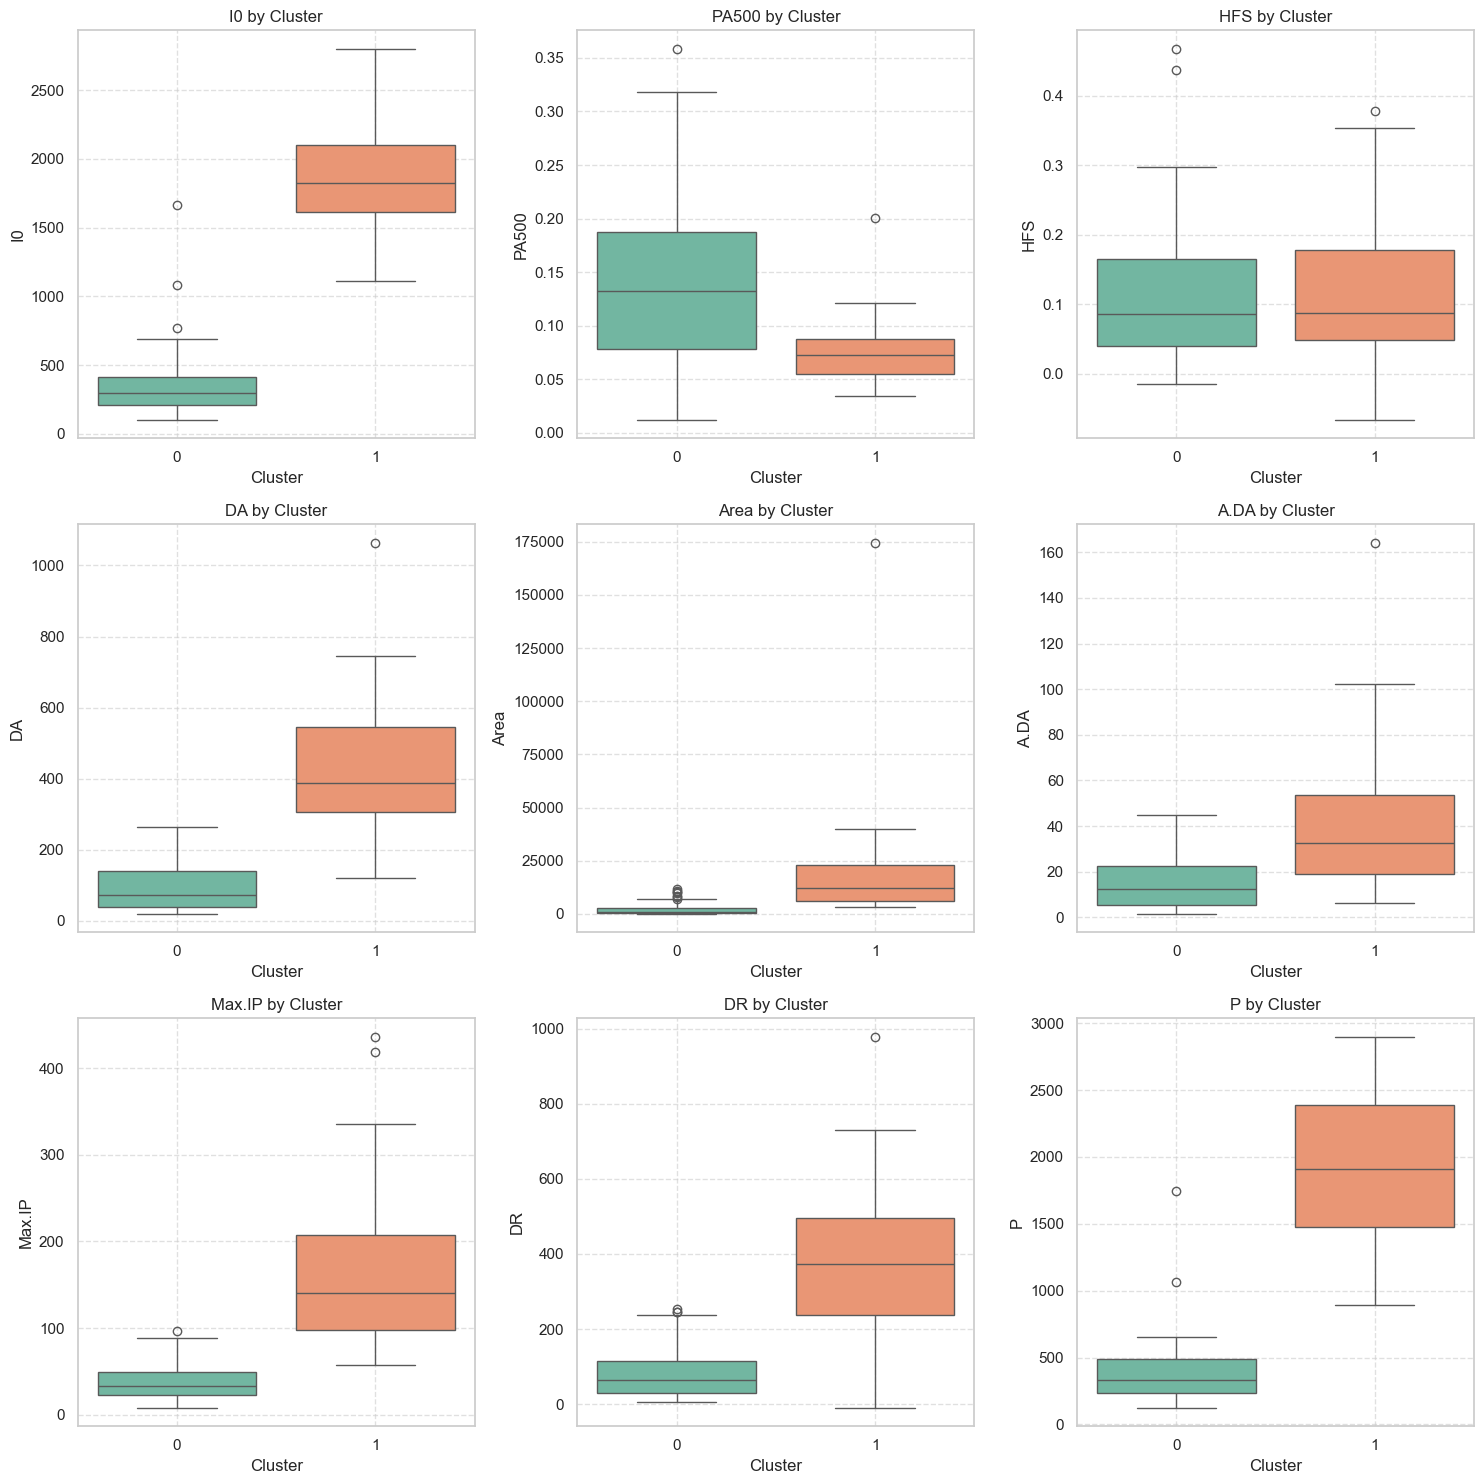

In [19]:

n_features = len(feature_names)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))
for i, feature in enumerate(feature_names):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Cluster', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} by Cluster')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('cluster_boxplots.png')

Kutuların Konumu: Özellikle I0, Area, DA, P grafiklerine bakın. Kutular (çeyrekler arası aralık) dikey eksende birbirinden tamamen kopuktur. Bu, Küme 0 ve Küme 1'in bu özellikler bakımından ne kadar kesin çizgilerle ayrıldığını kanıtlar.

Medyan Çizgisi: Kutunun içindeki çizgi medyandır. PA500 grafiğinde Küme 0'ın medyanının Küme 1'den belirgin şekilde yüksek olduğunu görebilirsiniz (Tümörlü dokunun karakteristik özelliği).